# **Credit Card Fraud Detection**

Project Overview

The goal of this project is to build a machine learning model for detecting fraudulent credit card transactions using a synthesized dataset. We'll explore the data, engineer features, select appropriate models, train and validate them, and evaluate their performance.





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

# **Data Exploration**


In [ ]:
transactions_df = pd.read_csv('train_transaction.csv') # Converts csv file to a pandas df

In [ ]:
transactions_df.head(10) # Checks the first 10 rows of the data frame

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2987005,0,86510,49.0,W,5937,555.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,0,86522,159.0,W,12308,360.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2987007,0,86529,422.5,W,12695,490.0,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2987008,0,86535,15.0,H,2803,100.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2987009,0,86536,117.0,W,17399,111.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
transactions_df.shape # Checks how many rows and coloums there are in the dataframe

(139960, 394)

In [ ]:
transactions_df.info() # Gets all the information about the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139960 entries, 0 to 139959
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 420.7+ MB


In [ ]:
transactions_df.isna() # Checks the df for missing values

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,False,False,False,False,False,False,True,False,False,False,...,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139955,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
139956,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
139957,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True
139958,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,True


In [ ]:
numeric_columns = transactions_df.select_dtypes(include=['int','float64']).columns # Identifies the numeric columns
string_columns = transactions_df.select_dtypes(include=['object']).columns # Identifies the oject/string columns
transactions_df[numeric_columns] = transactions_df[numeric_columns].fillna(transactions_df[numeric_columns].mean()) # Fills all NaN values with the mean of the column
display(transactions_df) # Displays updated df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.500,W,13926,370.893447,150.0,discover,142.0,...,0.137722,77.464809,99.971863,87.508693,8.642386,17.757647,12.528685,27.803835,32.739694,29.222079
1,2987001,0,86401,29.000,W,2755,404.000000,150.0,mastercard,102.0,...,0.137722,77.464809,99.971863,87.508693,8.642386,17.757647,12.528685,27.803835,32.739694,29.222079
2,2987002,0,86469,59.000,W,4663,490.000000,150.0,visa,166.0,...,0.137722,77.464809,99.971863,87.508693,8.642386,17.757647,12.528685,27.803835,32.739694,29.222079
3,2987003,0,86499,50.000,W,18132,567.000000,150.0,mastercard,117.0,...,0.137722,77.464809,99.971863,87.508693,8.642386,17.757647,12.528685,27.803835,32.739694,29.222079
4,2987004,0,86506,50.000,H,4497,514.000000,150.0,mastercard,102.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139955,3126955,1,2856511,185.977,C,2650,142.000000,185.0,mastercard,224.0,...,0.137722,77.464809,99.971863,87.508693,8.642386,17.757647,12.528685,27.803835,32.739694,29.222079
139956,3126956,0,2856512,4.315,C,9633,296.000000,185.0,visa,138.0,...,0.137722,77.464809,99.971863,87.508693,8.642386,17.757647,12.528685,27.803835,32.739694,29.222079
139957,3126957,0,2856544,25.950,W,12807,172.000000,150.0,visa,226.0,...,0.137722,77.464809,99.971863,87.508693,8.642386,17.757647,12.528685,27.803835,32.739694,29.222079
139958,3126958,0,2856631,27.000,W,14649,548.000000,150.0,visa,226.0,...,0.137722,77.464809,99.971863,87.508693,8.642386,17.757647,12.528685,27.803835,32.739694,29.222079


In [ ]:
transactions_df = transactions_df[transactions_df['isFraud'].isin([0,1])] # It was found that some isFraud were other numbers beside 0 and 1 so we filter those out
total_transactions = transactions_df['isFraud'].count() #Gets the total number of tranasctions
print(f"This dataset has {total_transactions} transactions") # prints the amount of tranctions
print()

fraud_count = transactions_df['isFraud'].value_counts() # Counts the number of fraudulent and genuine charges
print(fraud_count) # Prints the amount of genuine and fraduluent charges
print()

percentage_fraudulent = (fraud_count[1] / total_transactions) * 100 # Finds out what % of the charges are fraud
print(f"Out of {total_transactions} transactions,{percentage_fraudulent:.2f}% are fraudulent") # Prints the %

This dataset has 139960 transactions

isFraud
0    136348
1      3612
Name: count, dtype: int64

Out of 139960 transactions,2.58% are fraudulent


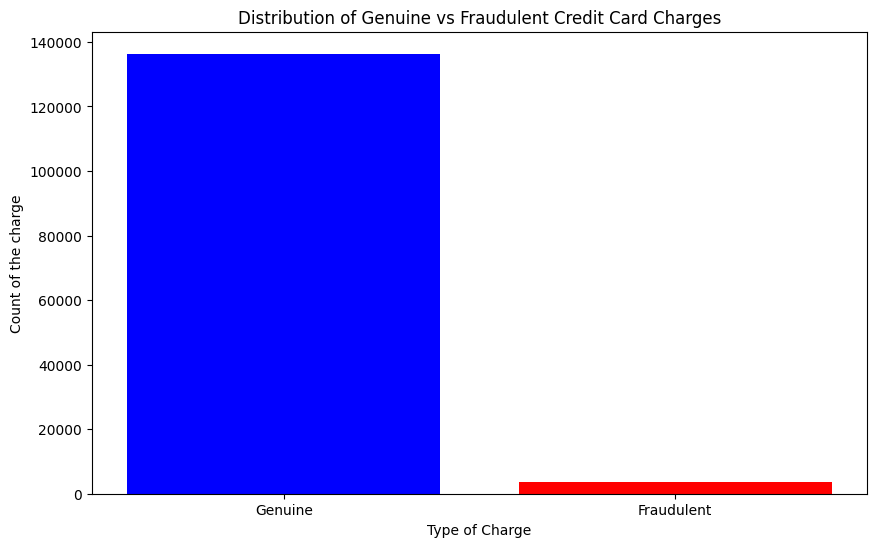

In [ ]:
# Plots a bar chart to show the distributaion of genuine and fradulent charges

genuine_charges = transactions_df[transactions_df['isFraud'] == 0].shape[0] # Gets the number of genuine charges
fraud_charges = transactions_df[transactions_df['isFraud'] == 1].shape[0] # Gets the number of fraudulent charges

colors =['blue','red'] # Defines the colors for the bar chart
plt.figure(figsize=(10, 6)) # Determines size of plot
plt.bar(['Genuine', 'Fraudulent'], [genuine_charges, fraud_charges], color = colors) # Defiines the infromation to be plotted
plt.title('Distribution of Genuine vs Fraudulent Credit Card Charges') # Adds a title to the plot
plt.xlabel('Type of Charge') # Labels the x axis
plt.ylabel('Count of the charge') # Labels the y axis
plt.show()  # Displays the plot


In [ ]:
card_type = transactions_df['card4'].value_counts() # Gets a count of all cards used
print(f"Here is a count all cards used")
print(card_type) # Prints the result
print()

fraudulent_charges = transactions_df[transactions_df['isFraud'] == 1] #Defines which charges are fraudulent
fraud_cards_count = fraudulent_charges['card4'].value_counts() # Gets a count of all that cards used in fraudulent chagres
print('Here is a count of which cards were used in fraud transactions')
print(fraud_cards_count) # Prints
print()

common_fraud_card = fraud_cards_count.idxmax() # Finds which card is used the most
common_fraud_card_count = fraud_cards_count.max() # Finds the count of which card is most fraudulent
print(f"The most common card used in the fraudulent chages are {common_fraud_card} cards. {common_fraud_card} was used in {common_fraud_card_count} transactions") # Prints which card is used the most

Here is a count all cards used
card4
visa                92073
mastercard          41400
american express     4504
discover             1975
Name: count, dtype: int64

Here is a count of which cards were used in fraud transactions
card4
visa                2297
mastercard          1217
discover              52
american express      44
Name: count, dtype: int64

The most common card used in the fraudulent chages are visa cards. visa was used in 2297 transactions


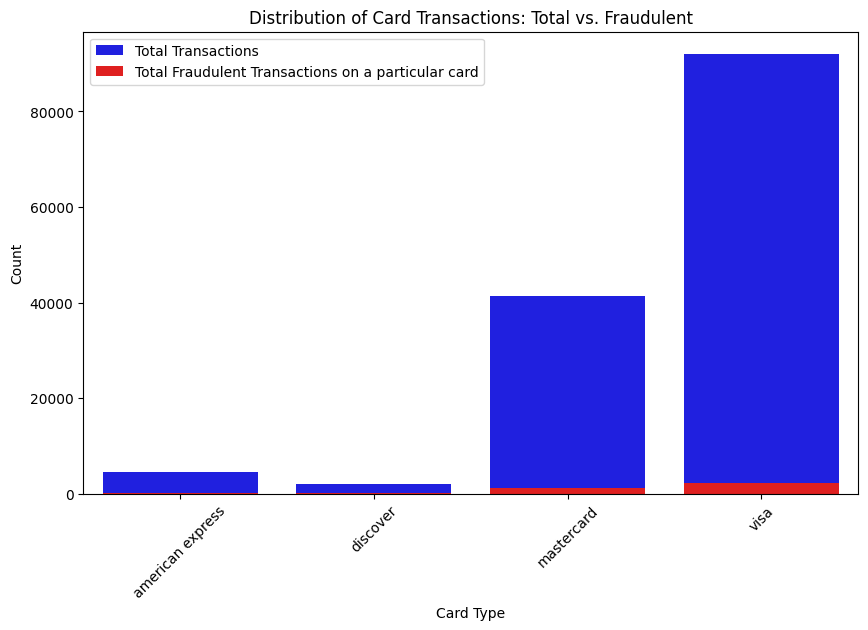

In [ ]:
# Plots the card types

combined_index = card_type.index.union(fraud_cards_count.index)
card_type = card_type.reindex(combined_index, fill_value=0)
fraud_cards_count = fraud_cards_count.reindex(combined_index, fill_value=0)
plt.figure(figsize=(10, 6))
sns.barplot(x=card_type.index, y=card_type.values, color='blue', label='Total Transactions')
sns.barplot(x=fraud_cards_count.index, y=fraud_cards_count.values, color='red', label='Total Fraudulent Transactions on a particular card')
plt.title('Distribution of Card Transactions: Total vs. Fraudulent')
plt.xlabel('Card Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# **Feature Engineering**


In [ ]:
selected_columns = ['TransactionAmt'] # Selecting columns to be scaled
scaler = StandardScaler() # Calls StandardScaler to be used
transactions_df[selected_columns] = scaler.fit_transform(transactions_df[selected_columns]) # perfroms the scaling on the selected columns
display(transactions_df.head()) # Displays the updated df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,-0.295818,W,13926,370.893447,150.0,discover,142.0,...,0.137722,77.464809,99.971863,87.508693,8.642386,17.757647,12.528685,27.803835,32.739694,29.222079
1,2987001,0,86401,-0.493633,W,2755,404.000000,150.0,mastercard,102.0,...,0.137722,77.464809,99.971863,87.508693,8.642386,17.757647,12.528685,27.803835,32.739694,29.222079
2,2987002,0,86469,-0.343394,W,4663,490.000000,150.0,visa,166.0,...,0.137722,77.464809,99.971863,87.508693,8.642386,17.757647,12.528685,27.803835,32.739694,29.222079
3,2987003,0,86499,-0.388465,W,18132,567.000000,150.0,mastercard,117.0,...,0.137722,77.464809,99.971863,87.508693,8.642386,17.757647,12.528685,27.803835,32.739694,29.222079
4,2987004,0,86506,-0.388465,H,4497,514.000000,150.0,mastercard,102.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# **Model Selection**


In [ ]:
X = transactions_df['TransactionAmt'] # Slected Feature
y = transactions_df['isFraud'] # Target Value

# Displays teh feature and target
print('Slected Features:')
print(X[:5]) # Prints the first 5
print()
print('Selected Labels')
print(y[:5]) # Prints the first 5
print()

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0) # Splits the data


X_train_reshaped = X_train.values.reshape(-1, 1)  # Reshape training feature to (n_samples, n_features) - required by scikit-learn models
X_test_reshaped = X_test.values.reshape(-1, 1)    #  # Reshape testing feature to (n_samples, n_features) - required by scikit-learn models

clf = RandomForestClassifier(n_estimators = 100,random_state = 0) # Initialize thr Random Forest Model
clf.fit(X_train_reshaped,y_train) # Trains the model

y_pred = clf.predict(X_test_reshaped) # Makes predictions
print('Actual vs Predictions') # Prints short name of table
print(pd.DataFrame({'Actual':y_test,'Prediction':y_pred}).head()) # Prints the results as a df
print()

model = clf # Defines the model used
cross_val_scores = cross_val_score(clf, X.values.reshape(-1, 1), y, cv=5, scoring='accuracy', error_score='raise')  # Calculates the cross validation score
print('Cross Validation:') # Prints name of heading
print(cross_val_scores) # Prints score

Slected Features:
0   -0.295818
1   -0.493633
2   -0.343394
3   -0.388465
4   -0.388465
Name: TransactionAmt, dtype: float64

Selected Labels
0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

Actual vs Predictions
        Actual  Prediction
66572        0           0
96209        0           0
108738       0           0
57629        0           0
29789        0           0

Cross Validation:
[0.97163475 0.97145613 0.97127751 0.97159903 0.97138468]


# **Model Evaluation**


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9742
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.5000


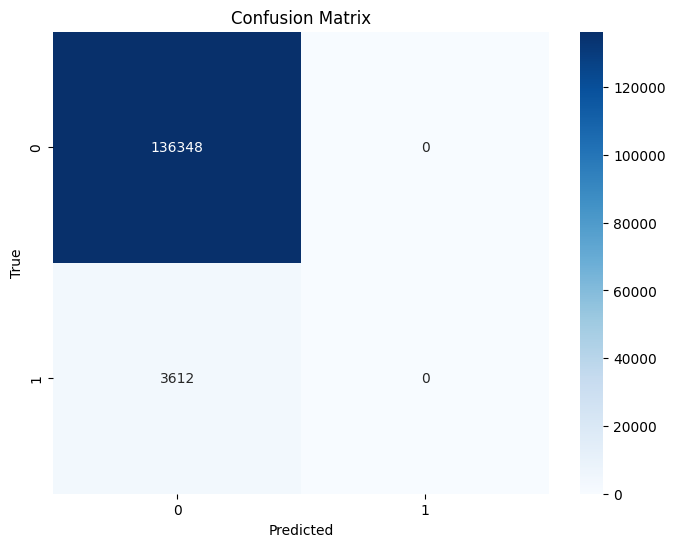

In [ ]:
def evaluate_model(y_true, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")

    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming the true labels are in the 'isFraud' column and predicted labels are in the 'predicted' column
y_true = transactions_df['isFraud']
y_pred = [0] * len(y_true)  # Assuming all predictions are 0 (non-fraud)

# Evaluate the model
evaluate_model(y_true, y_pred)

# **Model Persistence**


In [ ]:
import joblib
# Save the trained model
joblib.dump(model, 'fraud_detection_model.pkl')

# Load the saved model
loaded_model = joblib.load('fraud_detection_model.pkl')

# Load new dataset
new_data = pd.read_csv('test_transaction.csv')

# Use the loaded model to make predictions on the new data
predictions = loaded_model.predict(new_data['TransactionAmt'].values.reshape(-1, 1))

# Print the predictions
print("Predictions on new data:")
print(predictions)

# Create a DataFrame to display the new data along with the predictions
result_df = pd.DataFrame({'TransactionAmt': new_data['TransactionAmt'], 'Prediction': predictions})
print("\nNew data with predictions:")
print(result_df)

Predictions on new data:
[0 0 0 ... 0 0 0]

New data with predictions:
        TransactionAmt  Prediction
0               31.950           0
1               49.000           0
2              171.000           0
3              284.950           0
4               67.950           0
...                ...         ...
272624         100.000           0
272625          35.950           0
272626         100.000           0
272627          14.663           0
272628          82.950           0

[272629 rows x 2 columns]
